# Penalised regression

<img src="pictures/LassoRidge.gif" width = "500" style="float: right;"> 
## Ridge and Lasso Regression

Penalised regression fits a multivariate regression model $y=w_0+w_1x_1+...+w_Dx_D$ by minimising the loss
$$ F(\mathbf{w})=\frac{1}{2}\sum_{i=1}^N(y_i-\sum_{j=1}^Dw_jx_{ij}-w_0)^2+\frac{\lambda}{2} R(\mathbf{w})$$
where regularisation term $R(\mathbf{w})$ penalises large weights. 

**Ridge penalty** minimises sum of squares of the weights: $$R(\mathbf{w})=\sum_{j=1}^Dw_j^2$$ 
**Lasso penalty** minimises sum of absolute values of the weights: $$R(\mathbf{w})=\sum_{j=1}^D|w_j|$$  

Increasing parameter $\lambda$ results in solution getting closer to zero, as seen on the right. For Ridge, both weights decrease proportionally, however for Lasso, the smaller weight becomes zero quicker, resulting in a sparse solution.

In this notebook we will apply Ridge and Lasso regression to predict Gestational Age (GA) from volumes of 86 brain structures calculated from 164 MRI scans of preterm babies from Developing Human Connectomme Project.

### Load data

The code bellow loads the dataset with 86 brain volumes and creates feature matrix `X` and target vector `y`. Run the code.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

def CreateFeaturesTargets(filename):
    
    df = pd.read_csv(filename,header=None)
    
    # convert from 'DataFrame' to numpy array
    data = df.values

    # Features are in columns one to end
    X = data[:,1:]
    
    # Scale features
    X = StandardScaler().fit_transform(X)

    # Labels are in the column zero
    y = data[:,0]

    # return Features and Labels
    return X, y

X,y = CreateFeaturesTargets('datasets/GA-brain-volumes-86-features.csv')

print('Number of samples is', X.shape[0])
print('Number of features is', X.shape[1])

Number of samples is 164
Number of features is 86


### Linear regression

In the previous notebook we fitted linear regression to the data and calculated RMSE on the whole set and using cross-validation. Run the code bellow to calculate these measures again. Note the functions `RMSE` and `RMSE_CV`, you will need them later. 

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def RMSE(model,X,y):
    model.fit(X,y)
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print('RMSE:', round(rmse,2))
    return rmse

def RMSE_CV(model,X,y):
    scores = cross_val_score(model,X,y, scoring='neg_mean_squared_error',cv=5)
    rmse_cv = np.sqrt(-np.mean(scores))
    print('RMSE_CV:', round(rmse_cv,2))
    return rmse_cv

# choose linear regression model
model_linreg = LinearRegression()

# calculate RMSE on whole set
rmse = RMSE(model_linreg,X,y)

# calculate RMSE using cross-validation
rmse_cv = RMSE_CV(model_linreg,X,y)

RMSE: 0.69
RMSE_CV: 2.08


__Activity 1:__ Did linear regression overfit the dataset with 86 features? How did you decide on that?

__Answer__: Yes, because RMSE_CV is much higher than RMSE.

### Ridge regression
__Activity 2:__ Fill in the code bellow to calculate RMSE and RMSE_CV for `Ridge` regression with default value of `alpha`. Run the code. 

In [3]:
from sklearn.linear_model import Ridge

# choose linear regression model
model = Ridge()
print('alpha=',model.alpha)

# calculate RMSE on whole set
rmse = RMSE(model,X,y)

# calculate RMSE using cross-validation
rmse_cv = RMSE_CV(model,X,y)

alpha= 1.0
RMSE: 0.74
RMSE_CV: 1.55


What is the default value of `alpha`? Did the ridge penalty reduce overfitting?

__Answer:__ The default value is `alpha=1`. The overfitting was reduced because RMSE increased and RMSE_CV decreased.

### Lasso regression
__Activity 3:__ Fill in the code bellow to calculate RMSE and RMSE_CV for `Lasso` regression with default value of `alpha`. Run the code. 

In [4]:
from sklearn.linear_model import Lasso

# choose linear regression model
model = Lasso()
print('alpha=',model.alpha)

# calculate RMSE on whole set
rmse = RMSE(model,X,y)

# calculate RMSE using cross-validation
rmse_cv = RMSE_CV(model,X,y)

alpha= 1.0
RMSE: 1.55
RMSE_CV: 1.76


What is the default value of `alpha`? Did the lasso penalty reduce overfitting?

__Answer:__ The default value is also `alpha=1`. The overfitting was reduced because RMSE increased and RMSE_CV decreased.

## Exercise 3: Compare Ridge and Lasso Regression
In this exercise we will tune Ridge and Lasso regression models to predict GA from 86 brain volumes. We will calculate the performance and plot the coefficients of the fitted models.

### Task 3.1: Ridge regression

Fit `Ridge` regression model. Fill in the code bellow to perform grid search for optimal parameter `alpha` using `GridSearchCV`. Save the tuned Ridge regression model.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# grid for hyperparameter alpha 
parameters = {"alpha": np.logspace(-3,3,100)}

# create ridge model
model = Ridge()

# perform grid search
grid_search = GridSearchCV(model, parameters,cv=5,scoring = 'neg_mean_squared_error')
grid_search.fit(X, y)

# remember optimised model
model_ridge = grid_search.best_estimator_

Print out the optimal `alpha`, RMSE on training set and the best cross-validated RMSE.

In [6]:
# Print optimal alpha
print('alpha=', round(model_ridge.alpha,2))

# Calculate RMSE and RMSE_CV
rmse = RMSE(model_ridge,X,y)
rmse_cv = RMSE_CV(model_ridge,X,y)

# alternative solution
# print('Best score:', round(np.sqrt(-grid_search.best_score_),2))

alpha= 46.42
RMSE: 0.92
RMSE_CV: 1.17


Run the code bellow to see the evolution of RMSE_CV for Ridge with increasing `alpha`

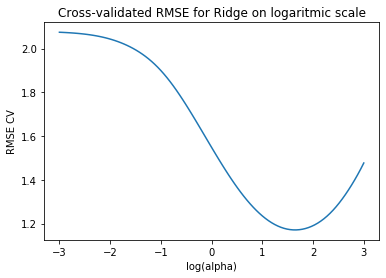

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(np.linspace(-3,3,100),np.sqrt(-grid_search.cv_results_['mean_test_score']))
plt.xlabel('log(alpha)')
plt.ylabel('RMSE CV')
_=plt.title('Cross-validated RMSE for Ridge on logaritmic scale')

### Task 3.2: Lasso regression
Fit `Lasso` regression model. Perform grid search for optimal parameter `alpha` using `GridSearchCV`. Save the tuned Lasso regression model.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# grid for hyperparameter alpha 
parameters = {"alpha": np.logspace(-1,3,100)}

# create ridge model
model = Lasso()

# perform grid search
grid_search = GridSearchCV(model, parameters,cv=5,scoring = 'neg_mean_squared_error')
grid_search.fit(X, y)

# remember optimised model
model_lasso = grid_search.best_estimator_

Print out the optimal `alpha`, RMSE on training set and the best cross-validated RMSE. Does it perform as well as ridge?

In [9]:
# Print optimal alpha
print('alpha=', round(model_lasso.alpha,2))

# Calculate RMSE and RMSE_CV
rmse = RMSE(model_lasso,X,y)
rmse_cv = RMSE_CV(model_lasso,X,y)

# alternative solution
# print('Best score:', round(np.sqrt(-grid_search.best_score_),2))

alpha= 0.16
RMSE: 1.07
RMSE_CV: 1.3


__Answer:__ Lasso did not perform as well s Ridge.

Run the code bellow to see the evolution of RMSE_CV for Lasso with increasing `alpha`

Text(0.5, 1.0, 'Cross-validated RMSE for Lasso on logaritmic scale')

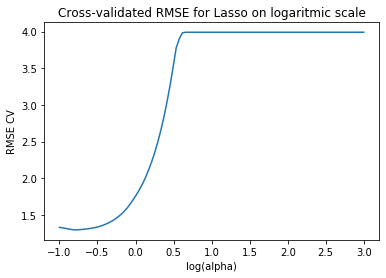

In [10]:
plt.plot(np.linspace(-1,3,100),np.sqrt(-grid_search.cv_results_['mean_test_score']))
plt.xlabel('log(alpha)')
plt.ylabel('RMSE CV')
plt.title('Cross-validated RMSE for Lasso on logaritmic scale')

### Task 3.3: Plot the weights

Finally let's plot the coefficients $\mathbf{w}$ of the fitted `LinearRegression`, `Ridge` and `Lasso`. Fill in the code to plot the weights. See whether the coefficients are smaller for penalised regression and whether they are sparser for Lasso.

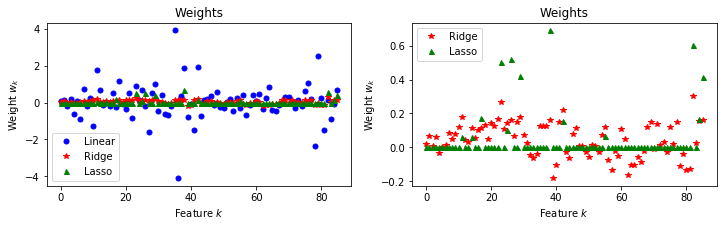

In [11]:
plt.figure(figsize = [12,3])
plt.subplot(121)

# Compare weights of linear, Ridge and Lasso regression
plt.plot(model_linreg.coef_,'bo',label = 'Linear', markersize = 5)
plt.plot(model_ridge.coef_,'r*',label = 'Ridge')
plt.plot(model_lasso.coef_,'g^',label = 'Lasso', markersize = 5)
plt.title('Weights')
plt.xlabel('Feature $k$')
plt.ylabel('Weight $w_k$')
plt.legend()

# Compare weights od Ridge and Lasso regression
plt.subplot(122)
plt.plot(model_ridge.coef_,'r*',label = 'Ridge')
plt.plot(model_lasso.coef_,'g^',label = 'Lasso', markersize = 5)
plt.title('Weights')
plt.xlabel('Feature $k$')
plt.ylabel('Weight $w_k$')
_=plt.legend()